In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder            
from sklearn.svm import LinearSVC             
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier          
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from astropy.table import Table, Column
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
from folium import plugins

In [4]:
df=pd.read_csv(r"C:\\Users\zarnab shahid\Downloads\CMAPS_newData4.csv")
print("------------------------------------------------------")
print("------------------------------------------------------")
df.index.Rating = ['index']
df.head()

------------------------------------------------------
------------------------------------------------------


,Posting,Date,Month,Year,Days,Time,Offences,Offence Categories,Part of the Day,Latitudes,Longitudes,TGAT
0,Allama Iqbal Town,26,1,2018,Friday,0:00,Outraging the Modesty of Women,Crime Against Person,1st,31.5124,74.2845,"31.5124,74.2845"
1,Allama Iqbal Town,21,3,2018,Wednesday,0:00,Other Crime,Others,1st,31.5124,74.2845,"31.5124,74.2845"
2,Allama Iqbal Town,30,3,2018,Friday,0:00,Other Crime,Others,1st,31.5124,74.2845,"31.5124,74.2845"
3,Allama Iqbal Town,26,4,2018,Thursday,0:00,punjab arms ordinance bill of 2015,Ordinance,1st,31.5124,74.2845,"31.5124,74.2845"
4,Allama Iqbal Town,3,5,2018,Thursday,0:00,Other Crime,Others,1st,31.5124,74.2845,"31.5124,74.2845"


In [5]:
df.count

<bound method DataFrame.count of                  Posting  Date  Month   Year       Days   Time  \
0      Allama Iqbal Town    26       1  2018     Friday   0:00   
1      Allama Iqbal Town    21       3  2018  Wednesday   0:00   
2      Allama Iqbal Town    30       3  2018     Friday   0:00   
3      Allama Iqbal Town    26       4  2018   Thursday   0:00   
4      Allama Iqbal Town     3       5  2018   Thursday   0:00   
5      Allama Iqbal Town    22       5  2018    Tuesday   0:00   
6      Allama Iqbal Town    12       6  2018    Tuesday   0:00   
7      Allama Iqbal Town     4       6  2018     Monday   0:00   
8      Allama Iqbal Town    18       6  2018     Monday   0:00   
9      Allama Iqbal Town    30       6  2018   Saturday   0:00   
10     Allama Iqbal Town    20       6  2018  Wednesday   0:00   
11     Allama Iqbal Town     4       7  2018  Wednesday   0:00   
12     Allama Iqbal Town    25       8  2018   Saturday   0:00   
13     Allama Iqbal Town    21       8  201

In [6]:
df.columns

Index(['   Posting', 'Date', 'Month ', 'Year', 'Days', 'Time', 'Offences',
       'Offence Categories', 'Part of the Day', 'Latitudes', 'Longitudes',
       'TGAT'],
      dtype='object')

In [7]:
tr_df = df.copy()

In [ ]:
tr_df.columns=['posting', 'date', 'month', 'year', 'day', 'time', 'offences', 'crime_categories','partoftheday','latitude','longitude','location']

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 

In [ ]:
tr_df['crime_categories']= label_encoder.fit_transform(tr_df['crime_categories']) 
tr_df['crime_categories'].unique()

In [ ]:
tr_df['day']= label_encoder.fit_transform(tr_df['day']) 
tr_df['day'].unique()
tr_df['partoftheday']= label_encoder.fit_transform(tr_df['partoftheday']) 
tr_df['partoftheday'].unique()
tr_df['posting']= label_encoder.fit_transform(tr_df['posting']) 
tr_df['posting'].unique()
tr_df['location']= label_encoder.fit_transform(tr_df['location']) 
tr_df['location'].unique()
tr_df['offences']= label_encoder.fit_transform(tr_df['offences']) 
tr_df['offences'].unique()

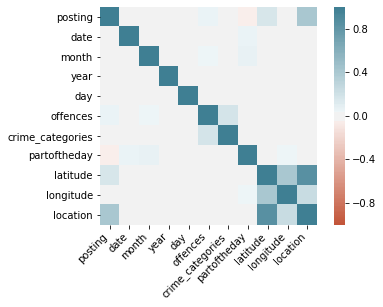

In [41]:
corr = tr_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


<function matplotlib.pyplot.show(*args, **kw)>

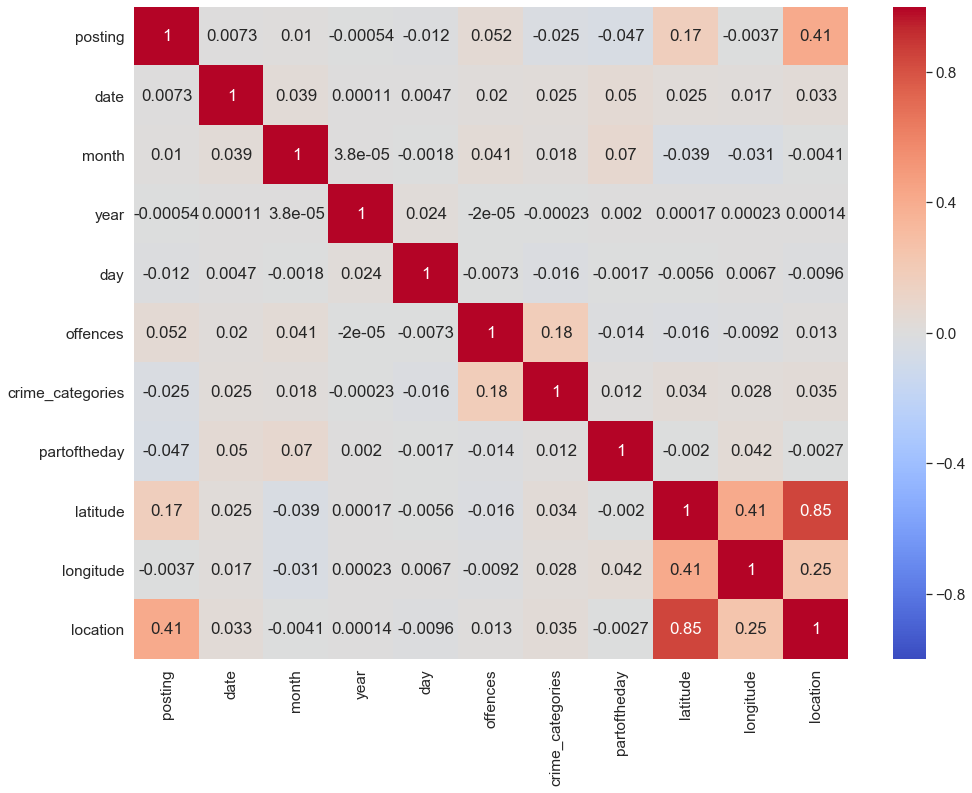

In [48]:
plt.figure(figsize=(16,12))
sns.set(font_scale=1.4)

sns.heatmap(tr_df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
plt.savefig("Heatmap of corr.png")
plt.show

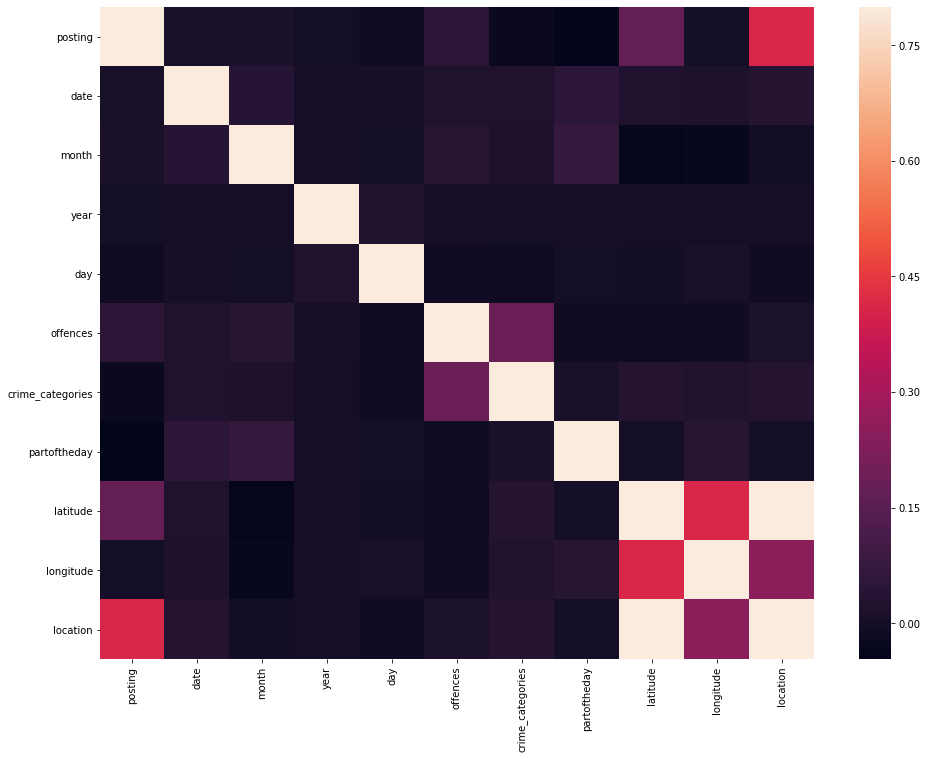

In [43]:
#Correlations 
import seaborn as sns

corrmat = tr_df.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [121]:
points = (df.Latitudes.fillna(0),df.Longitudes.fillna(0))
coordinates =[]
# Setting lat and long 
lat = points[0]
long = points[1]

map_heat = folium.Map(location=[31.5204,74.35874])
# Append latitude and longitude coordinates array
for la,lo in zip(lat,long):
    coordinates.append([la,lo])
   
map_heat.add_child(plugins.HeatMap(coordinates[0:69917]))

In [105]:
map_heat.save("heatmap.html")

In [ ]:
values_crime = df["Offence Categories"].value_counts() 
labels_crime = df["Offence Categories"].value_counts().keys()

In [ ]:
crime_theft = df[df["Offence Categories"].str.contains('Crime Against Property',  regex=True)] #Step 1.

values_theft = crime_theft["Offences"].value_counts() #Step 2.




labels_theft = values_theft.index #Step 5.

In [ ]:
plt.figure(num=None, figsize=(15, 12))


##############################   Crime    ################################

plt.pie(values_crime, autopct='%1.1f%%', pctdistance=0.85, startangle=90, explode = [0.05]*labels_crime.shape[0])

    #draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

    #title+legend
plt.title("Criminal Offences Types in Lahore",size=20)
plt.legend(labels_crime)

    # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.savefig("Criminal Offences Types in Lahore.png")
plt.show

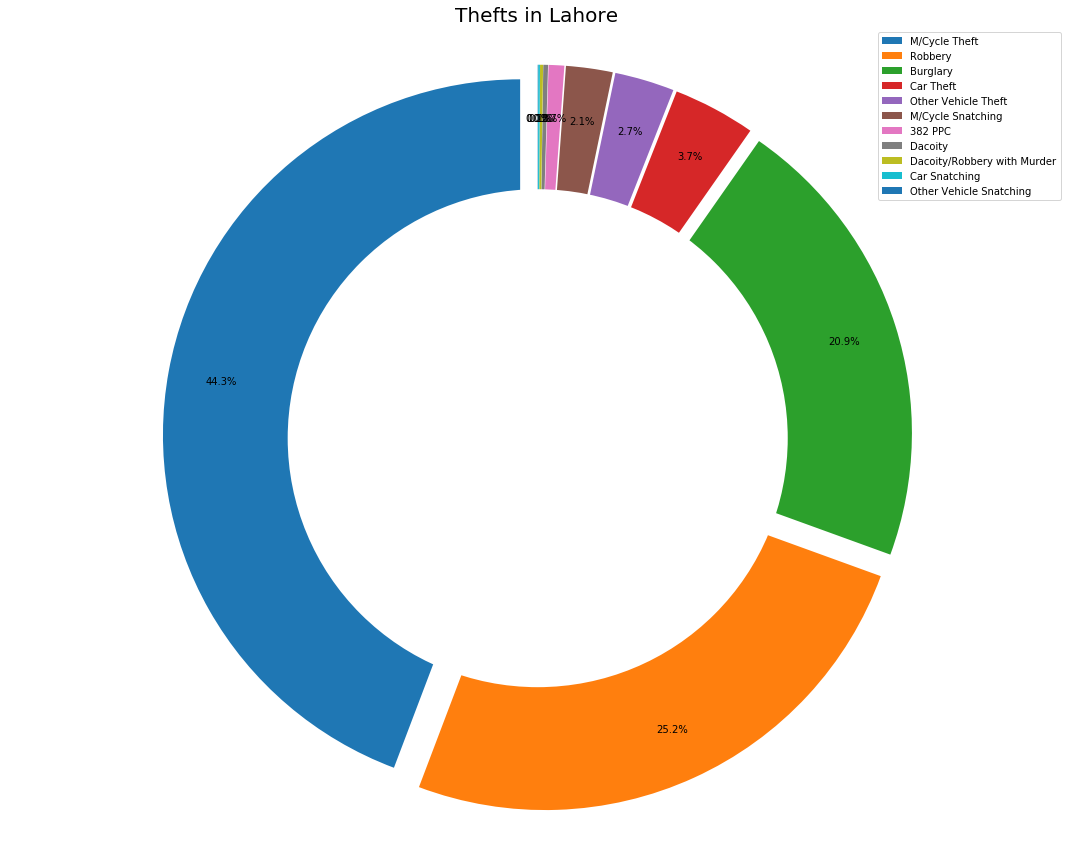

In [116]:
##############################   Thefts  ################################
plt.figure(num=None, figsize=(15, 12))
pie=plt.pie(values_theft, autopct='%1.1f%%',pctdistance=0.85, startangle=90, explode = [0.05]*labels_theft.shape[0])
    
    #draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

    #title+legend
plt.title("Thefts in Lahore",size=20)
plt.legend(labels_theft)
#plt.legend(pie[0],labels_theft, bbox_to_anchor=(1,0), loc="lower right", 
                          #bbox_transform=plt.gcf().transFigure)

    # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.savefig("Thefts in Lahore.png")
plt.show()

In [110]:
crime_person = df[df["Offence Categories"].str.contains('Crime Against Person',  regex=True)] #Step 1.

values_person = crime_person["Offences"].value_counts() #Step 2.




labels_person = values_person.index #Step 5.

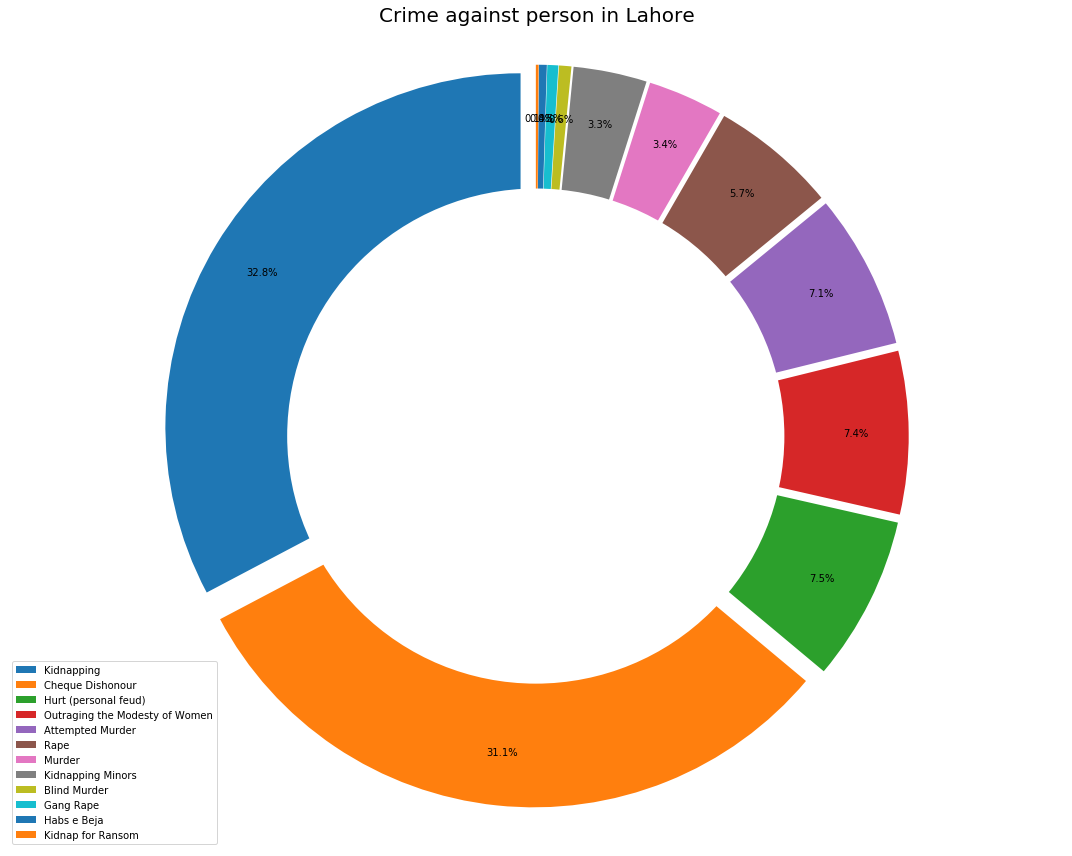

In [117]:
##############################   Thefts  ################################
plt.figure(num=None, figsize=(15, 12))
pie=plt.pie(values_person, autopct='%1.1f%%',pctdistance=0.85, startangle=90, explode = [0.05]*labels_person.shape[0])
    
    #draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

    #title+legend
plt.title("Crime against person in Lahore",size=20)
plt.legend(labels_person)
#plt.legend(pie[0],labels_theft, bbox_to_anchor=(1,0), loc="lower right", 
                          #bbox_transform=plt.gcf().transFigure)

    # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.savefig("Crime against person in Lahore.png")
plt.show()

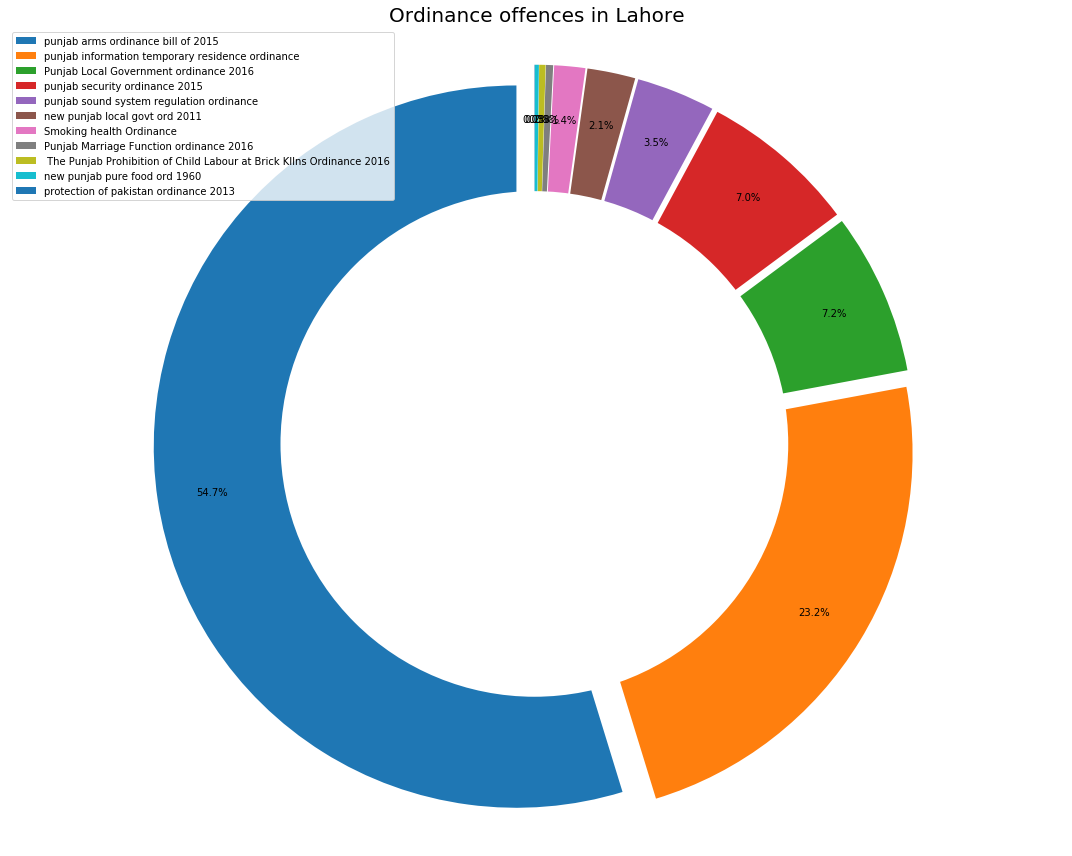

In [118]:
crime_Ordinance = df[df["Offence Categories"].str.contains('Ordinance',  regex=True)] #Step 1.

values_Ordinance= crime_Ordinance["Offences"].value_counts() 




labels_Ordinance = values_Ordinance.index 
plt.figure(num=None, figsize=(15, 12))
pie=plt.pie(values_Ordinance, autopct='%1.1f%%',pctdistance=0.85, startangle=90, explode = [0.05]*labels_Ordinance.shape[0])
    
    #draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

    #title+legend
plt.title("Ordinance offences in Lahore",size=20)
plt.legend(labels_Ordinance)
#plt.legend(pie[0],labels_theft, bbox_to_anchor=(1,0), loc="lower right", 
                          #bbox_transform=plt.gcf().transFigure)

    # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.savefig("Ordinance offences in Lahore.png")
plt.show()

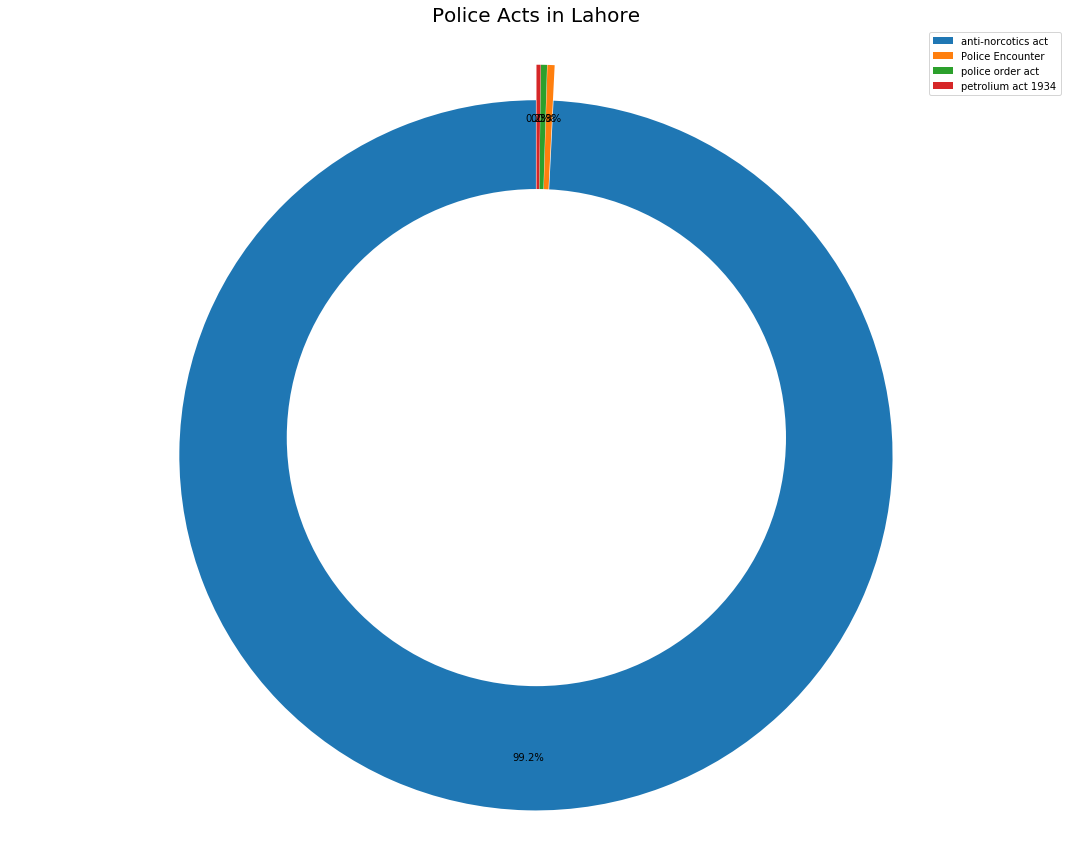

In [119]:
crime_pa = df[df["Offence Categories"].str.contains('Police Acts', regex=True)] 

values_pa= crime_pa["Offences"].value_counts() 
labels_pa = values_pa.index 
##############################  Police Acts ################################
plt.figure(num=None, figsize=(15, 12))
pie=plt.pie(values_pa, autopct='%1.1f%%',pctdistance=0.85, startangle=90, explode = [0.05]*labels_pa.shape[0])
    
    #draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

    #title+legend
plt.title("Police Acts in Lahore",size=20)
plt.legend(labels_pa)
#plt.legend(pie[0],labels_theft, bbox_to_anchor=(1,0), loc="lower right", 
                          #bbox_transform=plt.gcf().transFigure)

    # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.savefig("Police Acts in Lahore.png")
plt.show()

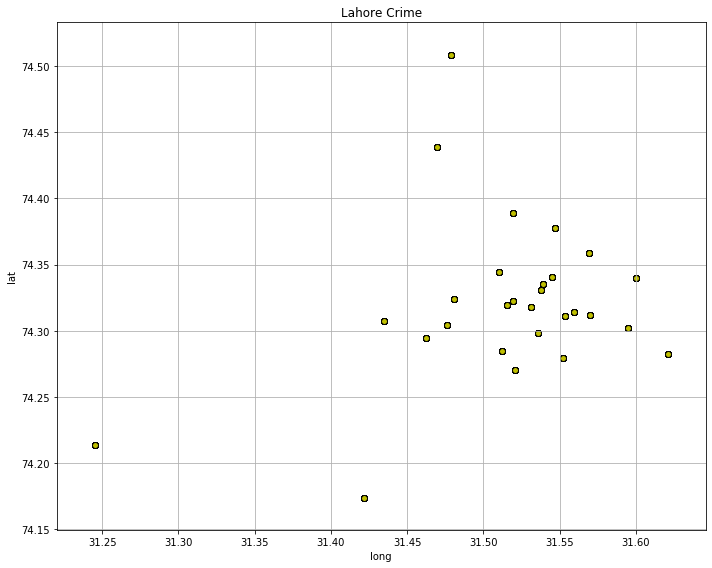

In [120]:
#scatter plot
plt.figure(num=None, figsize=(10, 8))
plt.scatter('Latitudes', 'Longitudes', data = df, c = 'y',edgecolor = 'black')
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Lahore Crime')
plt.tight_layout()
plt.axis('tight')

plt.savefig("Scatter plot of Criminal Offences in Lahore.png")
plt.show()